# NTCIR Dataset Exploration

In [2]:
%matplotlib inline

from __future__ import division

import brightside as bs
import numpy as np
import ntcir
import ntcir.IO as IO
import os
import re
import itertools

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

import collections
import pandas as pd

In [3]:
users = IO.load_annotations(ntcir.filepaths)
categories = IO.load_categories(ntcir.filepaths)
sorted_users = ntcir.utils.sort(users)
sequences = ntcir.get_sequences(sorted_users, 5)

## Plotting the categories distributions

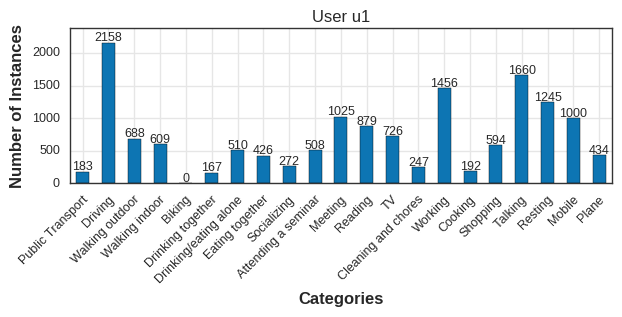

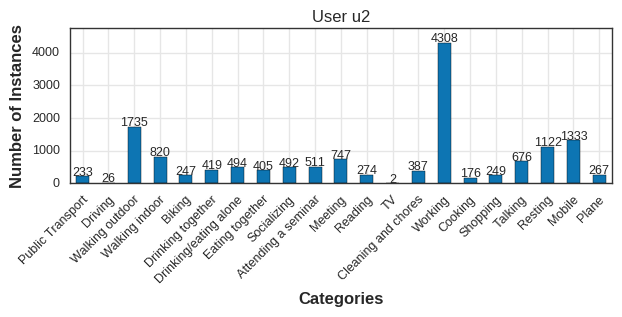

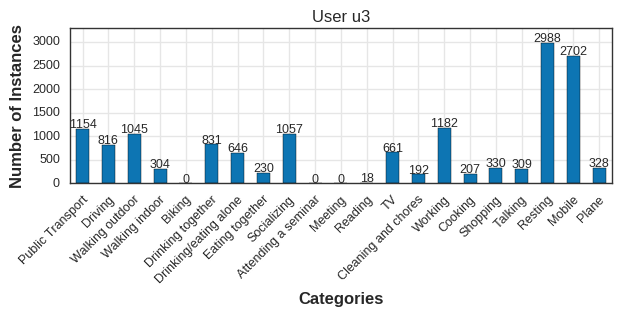

In [4]:
histograms = np.zeros((len(categories)),dtype=np.int)
all_histograms = np.zeros((len(categories),4),dtype=np.int)
for i, user in enumerate(sorted_users):
    user_labels = list()
    for day in user.days:
        for img in day.images:
             user_labels.append(img.label)
    histogram = np.histogram(user_labels, bins=len(categories))[0]
    histograms += histogram
    
    all_histograms[:,i] = histogram
    
    user_histogram = pd.DataFrame(data=histogram, index=categories)
    fig, ax = bs.plot_datasets_summary(user_histogram,figsize=(7,2),annot_rotation=45, axis_fontsize=9,title="User " + user.id_)
    plt.show()
all_histograms[:,i+1] = histograms

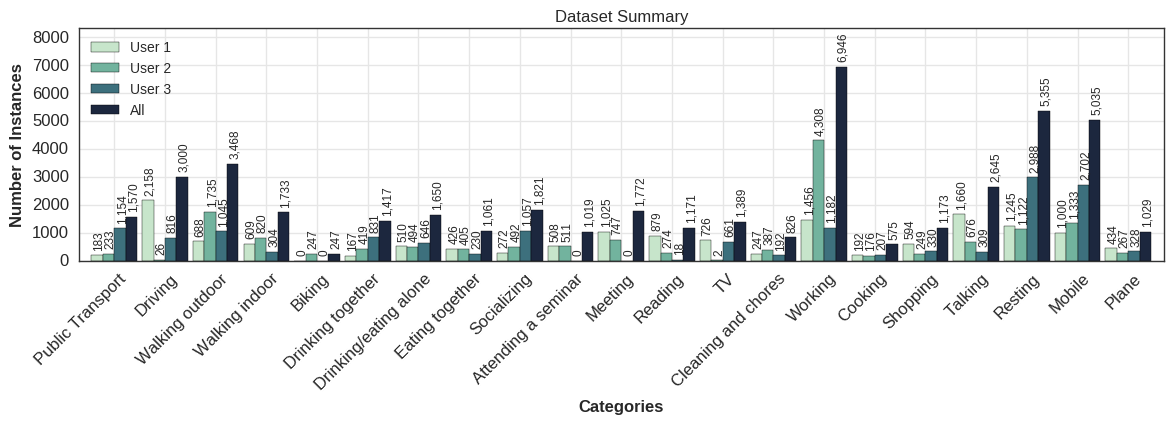

In [38]:
from pylab import annotate

histogram = pd.DataFrame(data=all_histograms,index=ntcir.categories,columns=['User 1','User 2','User 3', 'All'])

sns.color_palette()
from matplotlib.colors import ListedColormap

my_cmap = sns.cubehelix_palette(rot=-.4,as_cmap=True)

fig, ax = bs.plot_datasets_summary(histogram,figsize=(14,3),legend=False,width=0.9,annotate_cols=False,annot_rotation=45,colormap=my_cmap,title='Dataset Summary')
for i, (index, row) in enumerate(histogram.iterrows()):
    for j, col in enumerate(histogram.columns.values):
        annotate('{:,.0f}'.format(all_histograms[i,j]), (i+0.225*(j-1)-0.07, 200+row[col]), ha='center', va='bottom', fontsize=8.5, rotation=90)
plt.ylim([0, 1.2 * histogram.values.max()])

legend = ax.legend(loc='upper left', shadow=True)

plt.savefig('dataset_summary.eps', format='eps', dpi=300, bbox_inches='tight')

In [12]:
num_days = 0
for user in sorted_users:
    print user.id_, len(user.days)
    num_days+= len(user.days)
print 'total', num_days

u1 25
u2 25
u3 28
total 78
